# Square area grid for percentage values
A Matplotlib recreation of the square-matrix figure where the area of each inner square encodes a percentage out of 100. Layout knobs are grouped so spacing is easy to tweak.


In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import numpy as np

import dartwork_mpl as dm

dm.style.use("scientific")

In [2]:
col_labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
row_labels = [
    "Has extensive\nfamiliarity with gen AI",
    "Is comfortable using\ngen AI at work",
    "Provides feedback\non gen AI tools",
    "Wants to participate\nin the design of\ngen AI tools",
]

values = np.array(
    [
        [50, 49, 62, 47, 26, 22],
        [80, 87, 90, 82, 70, 71],
        [76, 77, 76, 65, 47, 55],
        [70, 76, 81, 77, 73, 76],
    ],
    dtype=float,
)

# Color by column (highlight the 35-44 group)
highlight_col = 2
base_color = "oc.blue6"
highlight_color = "oc.cyan5"
cell_colors = np.full(values.shape, base_color, dtype=object)
cell_colors[:, highlight_col] = highlight_color

layout = dict(
    figsize_cm=(30, 22),
    gs=dict(left=0.19, right=0.98, top=0.80, bottom=0.14, wspace=0.18, hspace=0.32),
    title_y=0.93,
    subtitle_y=0.86,
    col_label_pad=0.012,
    row_label_pad=0.015,
    footnote_pad=0.06,
    label_color="#182742",
    border_color="#cfd3d9",
    value_font_offset=-1,
)

In [3]:
def contrast_color(color, light="white", dark="#0f172a", threshold=0.55):
    r, g, b = mcolors.to_rgb(color)
    luminance = 0.299 * r + 0.587 * g + 0.114 * b
    return light if luminance < threshold else dark


def draw_cell(ax, pct, facecolor, bordercolor, align="center", value_fontsize=None):
    pct = float(np.clip(pct, 0, 100))
    side = np.sqrt(pct / 100.0)

    if align == "lower-left":
        x0, y0 = 0.0, 0.0
    elif align == "bottom-center":
        x0, y0 = (1.0 - side) / 2.0, 0.0
    else:  # center
        x0 = (1.0 - side) / 2.0
        y0 = (1.0 - side) / 2.0

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect("equal")
    ax.axis("off")

    outer = patches.Rectangle(
        (0, 0), 1, 1, facecolor="white", edgecolor=bordercolor, linewidth=1.0
    )
    ax.add_patch(outer)

    inner = patches.Rectangle(
        (x0, y0), side, side, facecolor=facecolor, edgecolor="none"
    )
    ax.add_patch(inner)

    text_color = contrast_color(facecolor)
    ax.text(
        x0 + side / 2.0,
        y0 + side / 2.0,
        f"{pct:.0f}",
        ha="center",
        va="center",
        fontsize=value_fontsize if value_fontsize is not None else dm.fs(-1),
        fontweight="bold",
        color=text_color,
    )


def plot_square_area_grid(
    values, row_labels, col_labels, colors, layout, align="center"
):
    values = np.asarray(values)
    nrows, ncols = values.shape

    fig = plt.figure(
        figsize=(dm.cm2in(layout["figsize_cm"][0]), dm.cm2in(layout["figsize_cm"][1])),
        dpi=300,
    )
    gs = fig.add_gridspec(nrows=nrows, ncols=ncols, **layout["gs"])
    axes = np.empty(values.shape, dtype=object)

    value_fs = dm.fs(layout.get("value_font_offset", -1))

    for i in range(nrows):
        for j in range(ncols):
            ax = fig.add_subplot(gs[i, j])
            draw_cell(
                ax,
                values[i, j],
                facecolor=colors[i, j],
                bordercolor=layout["border_color"],
                align=align,
                value_fontsize=value_fs,
            )
            axes[i, j] = ax

    label_color = layout["label_color"]
    for j, label in enumerate(col_labels):
        pos = axes[0, j].get_position()
        x = pos.x0 + pos.width / 2.0
        y = pos.y1 + layout["col_label_pad"]
        fig.text(
            x,
            y,
            label,
            ha="center",
            va="bottom",
            fontsize=dm.fs(0),
            fontweight="bold",
            color=label_color,
        )

    for i, label in enumerate(row_labels):
        pos = axes[i, 0].get_position()
        x = pos.x0 - layout["row_label_pad"]
        y = pos.y0 + pos.height / 2.0
        fig.text(
            x,
            y,
            label,
            ha="right",
            va="center",
            fontsize=dm.fs(-0.5),
            color=label_color,
            linespacing=1.5,
        )

    fig.text(
        layout["gs"]["left"],
        layout["title_y"],
        "Millennials aged 35 to 44 are AI optimists, with 90 percent indicating confidence in their gen AI abilities.",
        ha="left",
        va="bottom",
        fontsize=dm.fs(3),
        fontweight="bold",
        color=label_color,
    )

    fig.text(
        layout["gs"]["left"],
        layout["subtitle_y"],
        "US employee sentiment on gen AI, by age group, % of respondents",
        ha="left",
        va="bottom",
        fontsize=dm.fs(1),
        fontweight="bold",
        color=label_color,
    )

    footnote_y = layout["gs"]["bottom"] - layout["footnote_pad"]
    fig.text(
        layout["gs"]["left"],
        footnote_y,
        "Defined as those who have extensive experience (use several tools for complex tasks) and experts.",
        ha="left",
        va="top",
        fontsize=dm.fs(-3),
        color="#6b7280",
    )
    fig.text(
        layout["gs"]["left"],
        footnote_y - 0.03,
        "Source: McKinsey US employee survey, Oct-Nov 2024 (n = 3,002)",
        ha="left",
        va="top",
        fontsize=dm.fs(-3),
        color="#6b7280",
    )

    return fig, axes

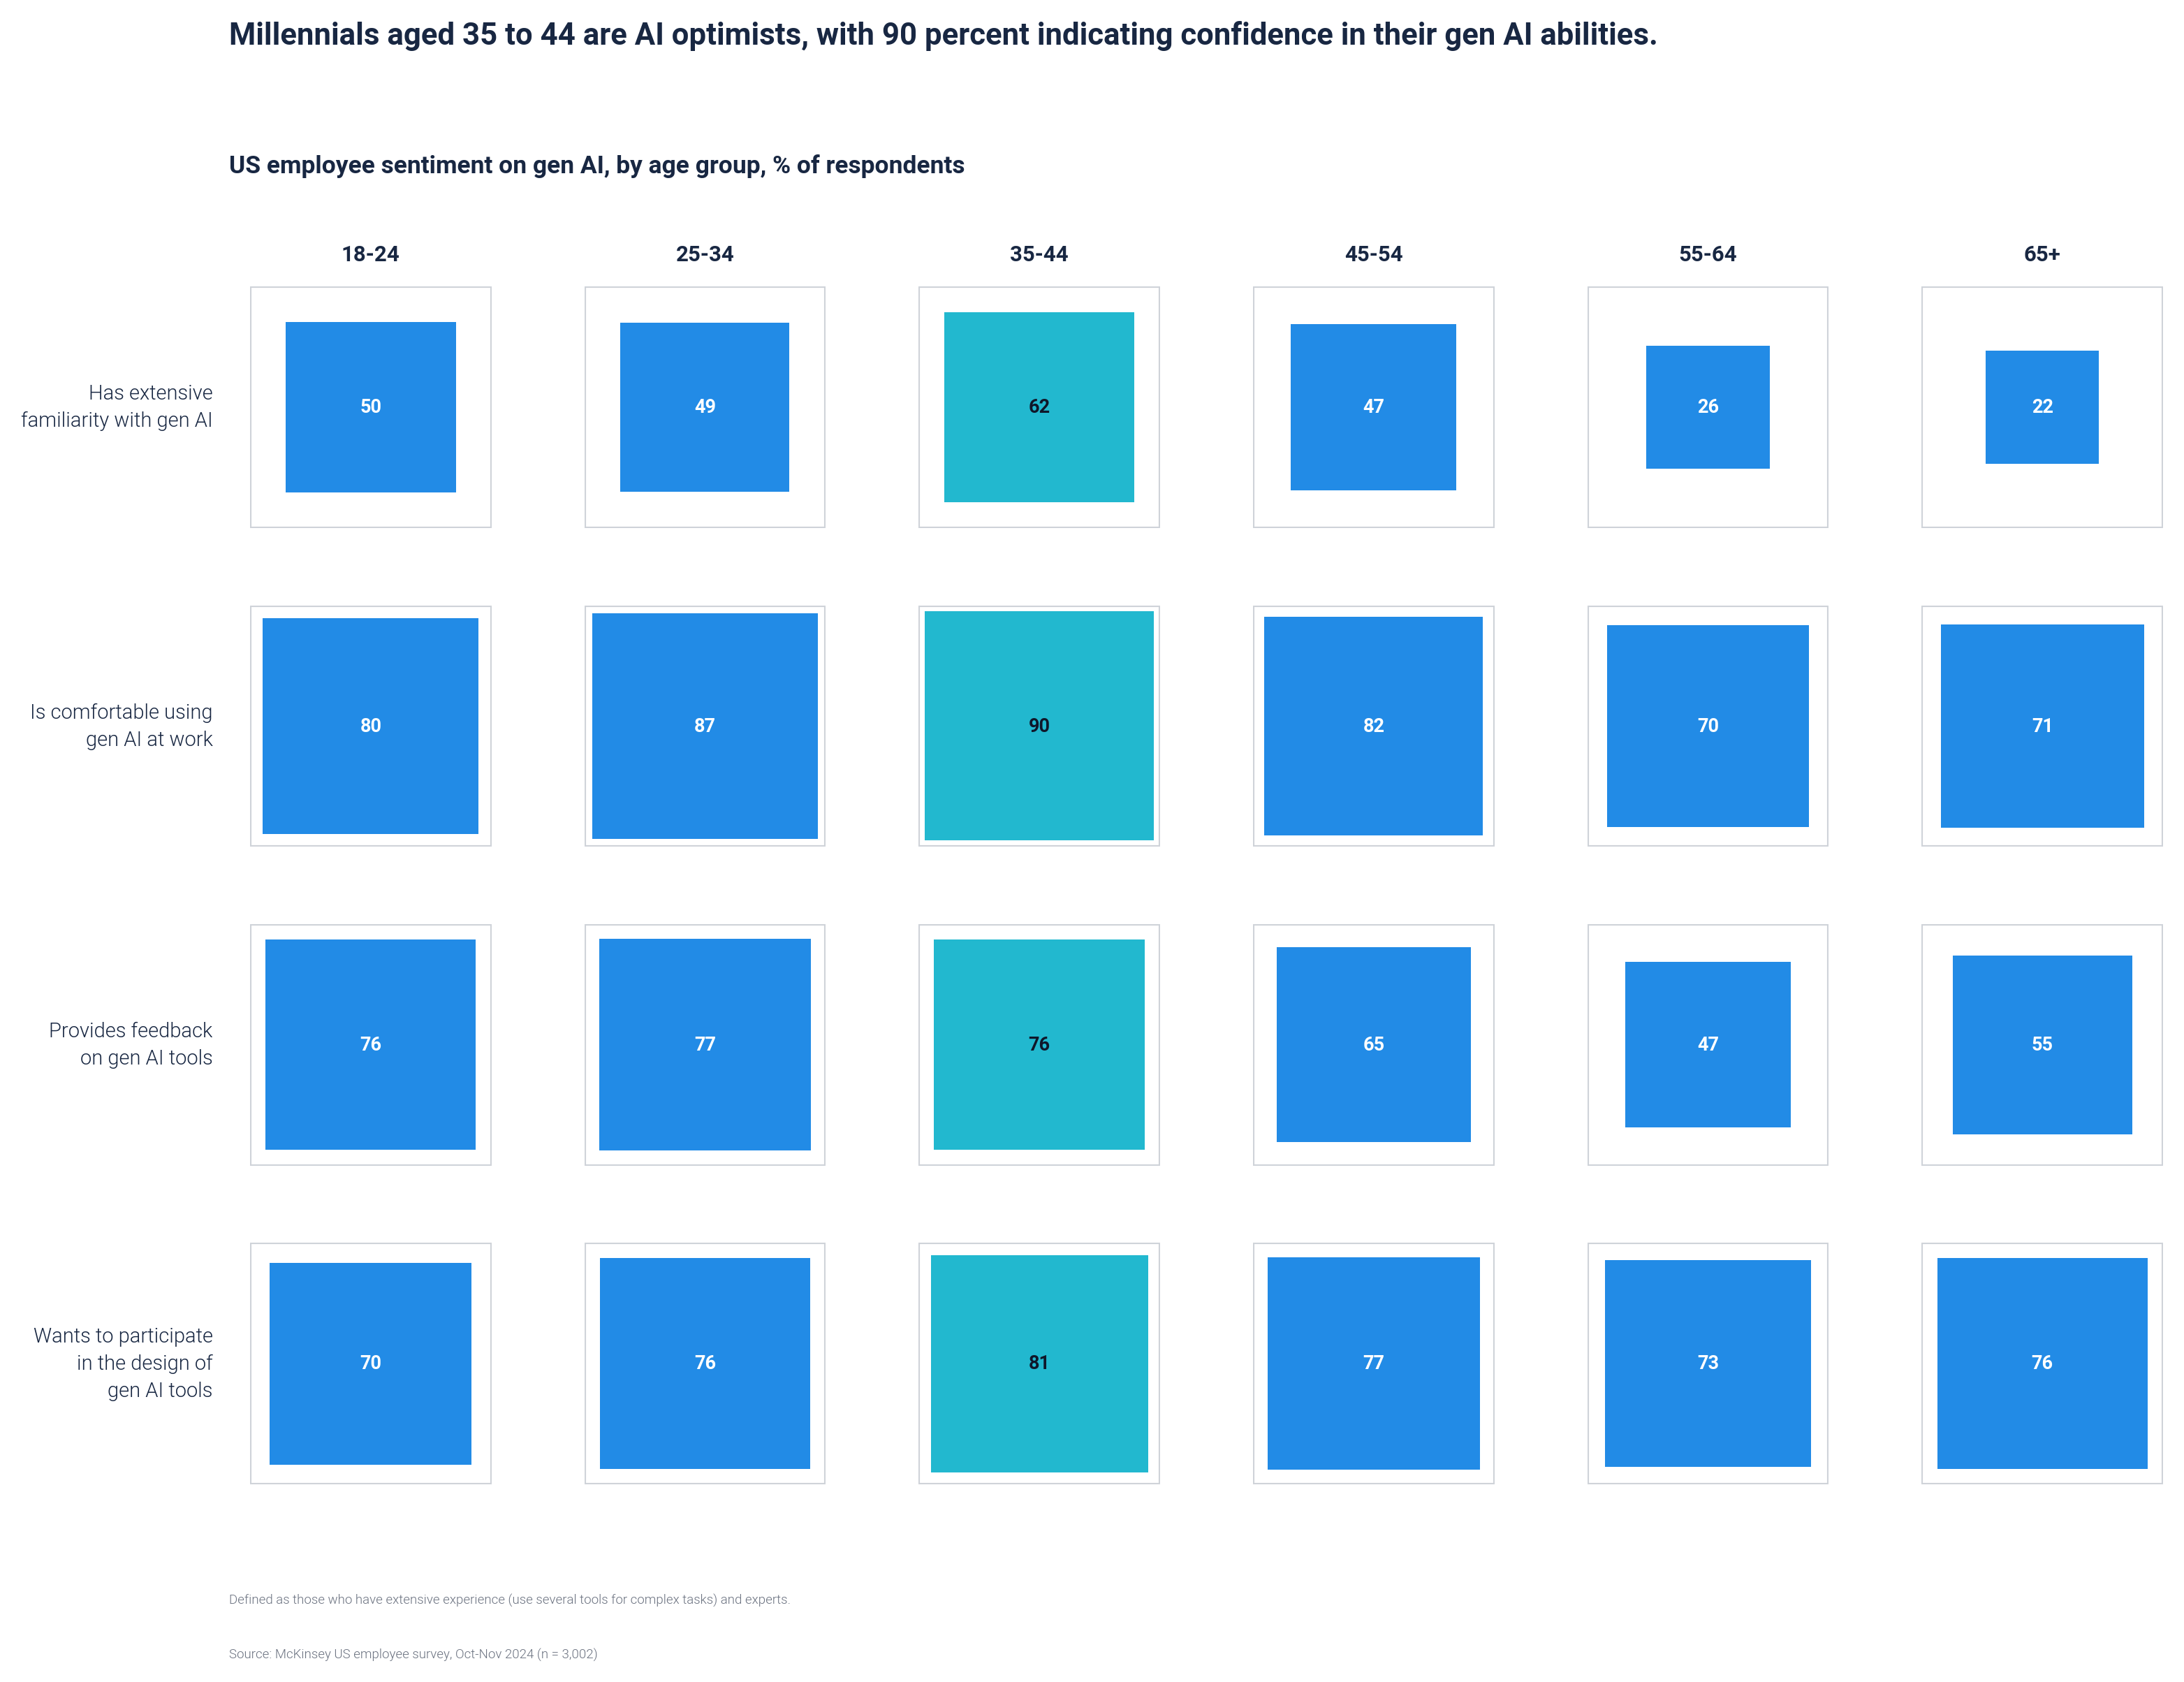

In [4]:
fig, axes = plot_square_area_grid(
    values,
    row_labels,
    col_labels,
    cell_colors,
    layout,
    align="center",  # switch to 'lower-left' to mimic the stacked-in-corner look
)

plt.show()